In [1]:
# 판다스 라이브러리 탑재
import pandas as pd

# CSV 파일 읽어오기
raw_data = pd.read_csv(r'C:\\sqlite\\mysql\\code\\수업\\survey_results_public\\data\\survey_results_public.csv')

# 데이터프레임 정보 확인하기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [2]:
# 일부 데이터 확안하기
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
# 개발자 타입 열 데이터 확인하기
raw_data['DevType']

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [4]:
# 문자열을 리스트로 변환
dev_type = raw_data['DevType'].str.split(';')
dev_type

0                                                      NaN
1                                                      NaN
2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 73268, dtype: object

In [5]:
# 결손치 제거
dev_type.dropna(inplace=True)
dev_type

2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
7                         [Developer, full-stack, Student]
8                                    [Developer, back-end]
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [6]:
# 리스트 항목을 각 열로 나누기
exploded_dev_type = dev_type.explode()
exploded_dev_type

2        Data scientist or machine learning specialist
2                                 Developer, front-end
2                                       Engineer, data
2                           Engineer, site reliability
3                                Developer, full-stack
                             ...                      
73267                         Data or business analyst
73267                                         Designer
73267                                        Scientist
73267                                  Product manager
73267                             System administrator
Name: DevType, Length: 164790, dtype: object

In [7]:
# 유일한 값 확인하기
exploded_dev_type.unique()

array(['Data scientist or machine learning specialist',
       'Developer, front-end', 'Engineer, data',
       'Engineer, site reliability', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Student', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist',
       'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'], dtype=object)

In [8]:
# 데이터 분석가 데이터만 추출하기
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]
data_analyst_data['DevType']

240                           Data or business analyst
400                           Data or business analyst
463      Data scientist or machine learning specialist
1089     Data scientist or machine learning specialist
1704     Data scientist or machine learning specialist
                             ...                      
73053                         Data or business analyst
73054                         Data or business analyst
73064    Data scientist or machine learning specialist
73204                         Data or business analyst
73264    Data scientist or machine learning specialist
Name: DevType, Length: 742, dtype: object

In [9]:
# 프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
# 데이터 확인
languages

240                   HTML/CSS;Python;Ruby;SQL;VBA
400                      Bash/Shell;C++;Python;SQL
463                          Bash/Shell;Python;SQL
1089                                        Python
1704             Elixir;Python;Rust;SQL;TypeScript
                           ...                    
73053                        PowerShell;Python;SQL
73054                                            R
73064                        Java;Python;Scala;SQL
73204          Bash/Shell;HTML/CSS;Julia;R;SQL;VBA
73264    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [10]:
# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(';')

# 데이터 확인
languages

240                   [HTML/CSS, Python, Ruby, SQL, VBA]
400                       [Bash/Shell, C++, Python, SQL]
463                            [Bash/Shell, Python, SQL]
1089                                            [Python]
1704             [Elixir, Python, Rust, SQL, TypeScript]
                              ...                       
73053                          [PowerShell, Python, SQL]
73054                                                [R]
73064                         [Java, Python, Scala, SQL]
73204         [Bash/Shell, HTML/CSS, Julia, R, SQL, VBA]
73264    [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [11]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

# 데이터 확인
exploded_languages

240        HTML/CSS
240          Python
240            Ruby
240             SQL
240             VBA
            ...    
73264    Bash/Shell
73264      HTML/CSS
73264    JavaScript
73264        Python
73264           SQL
Name: LanguageHaveWorkedWith, Length: 2566, dtype: object

In [12]:
# 프로그래밍 별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

# 데이터 빈도 역순으로 정렬
size_by_languages.sort_values(ascending=False, inplace=True)
size_by_languages

LanguageHaveWorkedWith
Python         624
SQL            440
R              213
Bash/Shell     174
JavaScript     169
HTML/CSS       147
C++            113
Java            85
VBA             70
C               66
C#              50
PowerShell      46
TypeScript      41
MATLAB          41
Julia           39
SAS             33
Scala           29
Go              22
Rust            22
PHP             16
Kotlin          10
Swift           10
Dart             9
Ruby             9
Assembly         8
Lua              8
Haskell          8
LISP             7
Perl             7
Clojure          6
APL              5
Objective-C      5
Groovy           4
Solidity         4
Fortran          3
Delphi           2
F#               2
Elixir           2
Crystal          1
OCaml            1
COBOL            1
Erlang           1
Name: LanguageHaveWorkedWith, dtype: int64

In [13]:
# 데이터프레임 만들기 위한 딕셔너리 만들기
frame = {'language': size_by_languages.index, 'count': size_by_languages.values}

# 데이터프레임 만들기
size_by_languages_df = pd.DataFrame(frame)
size_by_languages_df.head(10)

,language,count
0,Python,624
1,SQL,440
2,R,213
3,Bash/Shell,174
4,JavaScript,169
5,HTML/CSS,147
6,C++,113
7,Java,85
8,VBA,70
9,C,66


In [14]:
# 매트플랏립 라이브러리 탑재
import matplotlib.pyplot as plt

# Wordcloud 라이브러리 탑재
from wordcloud import WordCloud

In [15]:
# 데이터프레임을 딕셔너리로 변경하기
size_by_languages.to_dict()

{'Python': 624,
 'SQL': 440,
 'R': 213,
 'Bash/Shell': 174,
 'JavaScript': 169,
 'HTML/CSS': 147,
 'C++': 113,
 'Java': 85,
 'VBA': 70,
 'C': 66,
 'C#': 50,
 'PowerShell': 46,
 'TypeScript': 41,
 'MATLAB': 41,
 'Julia': 39,
 'SAS': 33,
 'Scala': 29,
 'Go': 22,
 'Rust': 22,
 'PHP': 16,
 'Kotlin': 10,
 'Swift': 10,
 'Dart': 9,
 'Ruby': 9,
 'Assembly': 8,
 'Lua': 8,
 'Haskell': 8,
 'LISP': 7,
 'Perl': 7,
 'Clojure': 6,
 'APL': 5,
 'Objective-C': 5,
 'Groovy': 4,
 'Solidity': 4,
 'Fortran': 3,
 'Delphi': 2,
 'F#': 2,
 'Elixir': 2,
 'Crystal': 1,
 'OCaml': 1,
 'COBOL': 1,
 'Erlang': 1}

In [16]:
# 워드클라우드 만들기
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(size_by_languages.to_dict())
wordcloud

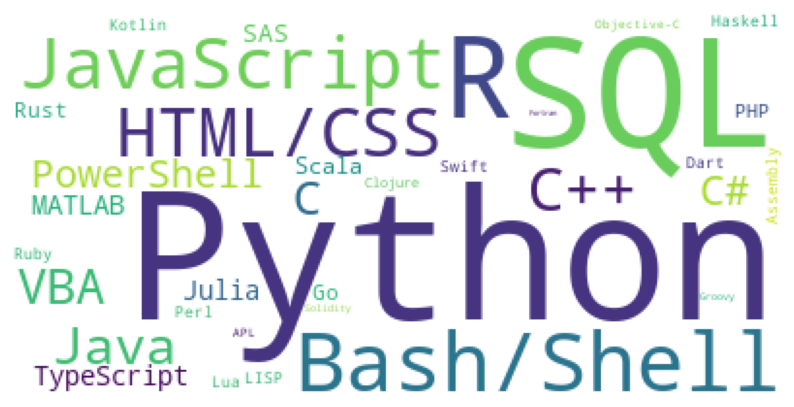

In [17]:
# 워드 클라우드 그리기
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
# plotly.express 모듈 탑재
import plotly.express as px

# 트리맵 그리기
fig = px.treemap(size_by_languages_df, path=['language'], values='count')
fig.show()

In [19]:
# 결손치 제거
languages.dropna(inplace=True)

# 필터링을 위한 리스트로 변환
lang_list = languages.to_list()

# 일부 값 확인
lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [20]:
# 추출 대상 프로그래밍 언어 선정
target_langs = ['Python', 'R', 'SQL','MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']

In [21]:
# 필터링 완료된 프로그래밍 언어를 담기 위한 리스트 생성
revised_lang_list = []

# 필터링을 위해 전체 리스트 순회
for lang in lang_list:
    
    # 추출 대상 프로그래밍 언어만 필터링
    filtered = [x for x in lang if x in target_langs]
    
    # 해당 리스트에 파이썬이 있는 경우에만 학습 대상 리스트에 추가
#     if 'Python' in filtered:
#         revised_lang_list.append(filtered)
        
    revised_lang_list.append(filtered)

# 필터링 결과 확인
revised_lang_list

[['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'SQL'],
 ['Go', 'Python'],
 ['Python'],
 ['Python'],
 ['Go', 'Java'],
 ['JavaScript', 'Python'],
 ['Python', 'R', 'SQL'],
 ['Julia', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'SQL'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SAS', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python', 'R', 'SAS', 'SQL'],
 ['Python', 'Scala', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'Python'],
 ['SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Java', 'Python'],
 ['Python'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Java', 'JavaScript', 'Python'],
 ['JavaSc

In [22]:
# 전처리 라이브러리 탑재
from mlxtend.preprocessing import TransactionEncoder

# 전처리기 생성
te = TransactionEncoder()

# 전처리 수행
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False,  True, False]])

In [23]:
# 전치리 결과를 데이터프레임으로 변환
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
724,False,False,False,False,False,True,False,False,True,False
725,False,False,False,False,False,False,True,False,False,False
726,False,True,False,False,False,True,False,False,True,True
727,False,False,False,True,False,False,True,False,True,False


In [24]:
# 학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

# 지지도 구하기
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True, verbose=1)

Processing 55 combinations | Sampling itemset size 54


In [25]:
# 학습 결과 확인하기
freq_items.sort_values(['support'], ascending=False).head(20)

,support,itemsets
5,0.855967,(Python)
8,0.603567,(SQL)
32,0.517147,"(Python, SQL)"
6,0.292181,(R)
30,0.237311,"(R, Python)"
2,0.231824,(JavaScript)
35,0.213992,"(R, SQL)"
20,0.211248,"(Python, JavaScript)"
64,0.182442,"(R, Python, SQL)"
22,0.160494,"(JavaScript, SQL)"


In [26]:
# 항목 집합의 항목 개수 추가하기
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.030178,(Go),1
1,0.116598,(Java),1
2,0.231824,(JavaScript),1
3,0.053498,(Julia),1
4,0.056241,(MATLAB),1
...,...,...,...
78,0.017833,"(R, Julia, Python, SQL)",4
79,0.019204,"(R, MATLAB, Python, SQL)",4
80,0.021948,"(R, Python, SQL, SAS)",4
81,0.012346,"(R, Python, SQL, Scala)",4


In [27]:
# 신뢰도와 향상도 구하기
rules = association_rules(freq_items, min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,0.637857
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,0.505233
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,0.717007
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,0.106486
4,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,-0.000382,0.999348,-0.051263
...,...,...,...,...,...,...,...,...,...,...
437,(JavaScript),"(R, SQL, Python, Java)",0.231824,0.016461,0.013717,0.059172,3.594675,0.009901,1.045397,0.939643
438,(Java),"(R, SQL, Python, JavaScript)",0.116598,0.048011,0.013717,0.117647,2.450420,0.008119,1.078921,0.670031
439,(Python),"(R, SQL, JavaScript, Java)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346,1.000000
440,(R),"(SQL, Python, JavaScript, Java)",0.292181,0.043896,0.013717,0.046948,1.069542,0.000892,1.003203,0.091860


In [28]:
# 산점도 그래프 그리기
fig=px.scatter(
    rules['support'], 
    rules['confidence'], 
    size=rules['lift'], 
    color=rules['lift']
)

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='support',
    yaxis_title='confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')
    
)

# 그래프 출력
fig.show()

In [29]:
# frozenset 데이터를 문자열로 변환하여 열 추가
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_str,consequents_str
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,0.637857,JavaScript,Go
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,0.505233,Go,JavaScript
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,0.717007,Python,Go
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,0.106486,Go,Python
4,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,-0.000382,0.999348,-0.051263,SQL,Go
...,...,...,...,...,...,...,...,...,...,...,...,...
437,(JavaScript),"(R, SQL, Python, Java)",0.231824,0.016461,0.013717,0.059172,3.594675,0.009901,1.045397,0.939643,JavaScript,"R,SQL,Python,Java"
438,(Java),"(R, SQL, Python, JavaScript)",0.116598,0.048011,0.013717,0.117647,2.450420,0.008119,1.078921,0.670031,Java,"R,SQL,Python,JavaScript"
439,(Python),"(R, SQL, JavaScript, Java)",0.855967,0.013717,0.013717,0.016026,1.168269,0.001976,1.002346,1.000000,Python,"R,SQL,JavaScript,Java"
440,(R),"(SQL, Python, JavaScript, Java)",0.292181,0.043896,0.013717,0.046948,1.069542,0.000892,1.003203,0.091860,R,"SQL,Python,JavaScript,Java"


In [30]:
# 산점도 그래프 그리기
fig=px.scatter(
    rules
    x='support', 
    y='confidence', 
    size='lift', 
    color='lift',
    hover_data=['antecedents_str', 'consequents_str']
)

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='support',
    yaxis_title='confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')
    
)

# 그래프 출력
fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (40893574.py, line 3)

In [ ]:
# 항목이 하나인 값만 필터링하기
rules_for_single = rules[rules.apply(lambda x: (len(x['antecedents']) == 1 and len(x['consequents']) == 1), axis=1)]
rules_for_single.head(20)

In [ ]:
# 프로그래밍 언어 문자열로 추출
rules_for_single_df = pd.DataFrame(rules_for_single['antecedents'].apply(lambda x: list(x)[0]))
rules_for_single_df['consequents'] = rules_for_single['consequents'].apply(lambda x: list(x)[0])
rules_for_single_df['confidence'] = rules_for_single['confidence']

rules_for_single_df.head(20)

In [ ]:
# 히트맵용 데이터프레임 생성, 색인은 대상 프로그래밍 언어로 설정
revised_rules_df = pd.DataFrame(index=target_langs)

# 대상 프로그래밍 언어 순회
for col in target_langs:
    
    # 열 설정을 위한 빈 리스트 생성
    col_conf = []
    for row in target_langs:
        
        # 신뢰도 확보, 조건 언어는 줄, 결과 언어는 행으로 설정
        confidence = rules_for_single_df[rules_for_single_df['antecedents'] == row][rules_for_single_df['consequents'] == col]['confidence']
        
        # 신뢰도 값이 존재하는 경우에만 행에 값 추가
        if len(confidence.values) > 0:
            col_conf.append(confidence.values[0])
            
        # 그렇지 않은 경우 0 설정
        else:
            col_conf.append(0)
            
    # 완성된 열을 데이터프레임에 추가
    revised_rules_df[col] = col_conf
        
# 최종 데이터프레임 값 확인
revised_rules_df

In [ ]:
# Seaborn 라이브러리 탑재
import seaborn as sns

# 히트맵 크기 설정
plt.figure(figsize=(15, 5))

# 히트맵 그리기
heatmap = sns.heatmap(revised_rules_df, annot=True)